In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [37]:
pas = pd.read_csv(r'C:\Users\gosti\Downloads\Telegram Desktop\09-20220927T115737Z-001\09\passerbys.csv')

In [171]:
passe = pd.read_csv(r'C:\Users\gosti\Downloads\Telegram Desktop\09-20220927T115737Z-001\09\passerbys.csv')

In [38]:
weather = pd.read_csv(r'C:\Users\gosti\Downloads\Telegram Desktop\09-20220927T115737Z-001\09\weather.csv')

In [152]:
weather2 = pd.read_csv(r'C:\Users\gosti\Downloads\Telegram Desktop\09-20220927T115737Z-001\09\weather.csv')

**Линейная регрессия (в зависимости от месяца)**

In [159]:
weather2['DATE'] = weather2['DATE'].astype('datetime64')

In [158]:
weather2

,DATE,TAVG,PRCP
0,2000-01-01,4.4,6.9
1,2000-01-02,-3.9,0.0
2,2000-01-03,5.6,7.1
3,2000-01-04,7.8,7.6
4,2000-01-05,5.0,0.0
...,...,...,...
7123,2019-07-03,15.0,0.0
7124,2019-07-04,17.0,0.0
7125,2019-07-05,17.2,0.0
7126,2019-07-06,17.5,0.0


In [162]:
weather2= weather2.rename(columns={'DATE' : 'Date'})

In [163]:
weather2 = weather2.set_index('Date')

In [164]:
weather2 = weather2.resample('M').mean()

In [165]:
weather2

,TAVG,PRCP
Date,,
2000-01-31,4.429032,3.087097
2000-02-29,6.627586,4.603448
2000-03-31,7.080645,2.316129
2000-04-30,10.640000,1.250000
2000-05-31,12.245161,2.680645
...,...,...
2019-03-31,8.654839,1.119355
2019-04-30,11.066667,2.993333
2019-05-31,15.300000,0.509677


In [39]:
pas.head()

,Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,2019-06-30 23:00:00,7.0,15.0
1,2019-06-30 22:00:00,20.0,30.0
2,2019-06-30 21:00:00,31.0,32.0
3,2019-06-30 20:00:00,72.0,58.0
4,2019-06-30 19:00:00,58.0,77.0


In [40]:
pas['Date'] = pas['Date'].astype('datetime64')

In [42]:
pas.tail(100)

,Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
58988,2012-10-07 03:00:00,4.0,2.0
58989,2012-10-07 02:00:00,2.0,1.0
58990,2012-10-07 01:00:00,12.0,5.0
58991,2012-10-07 00:00:00,6.0,5.0
58992,2012-10-06 23:00:00,15.0,19.0
...,...,...,...
59083,2012-10-03 04:00:00,6.0,1.0
59084,2012-10-03 03:00:00,2.0,3.0
59085,2012-10-03 02:00:00,1.0,1.0
59086,2012-10-03 01:00:00,4.0,6.0


In [43]:
pas = pas.set_index('Date')

In [166]:
pas = pas.resample('D').sum()

In [167]:
pas1 = pas.index

In [182]:
pas

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2012-10-31,33764.0,31931.0
2012-11-30,26062.0,24585.0
2012-12-31,18608.0,17761.0
2013-01-31,22910.0,21974.0
2013-02-28,25898.0,24129.0
...,...,...
2019-02-28,13816.0,22283.0
2019-03-31,34314.0,51143.0
2019-04-30,34226.0,53706.0


In [183]:
pas6 = pd.concat([pas, weather2], axis=1, join='inner')

In [184]:
pas6

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,TAVG,PRCP
Date,,,,
2012-10-31,33764.0,31931.0,NaN,5.493548
2012-11-30,26062.0,24585.0,NaN,7.016667
2012-12-31,18608.0,17761.0,NaN,5.612903
2013-01-31,22910.0,21974.0,NaN,3.409677
2013-02-28,25898.0,24129.0,NaN,1.439286
...,...,...,...,...
2019-02-28,13816.0,22283.0,2.621429,4.196429
2019-03-31,34314.0,51143.0,8.654839,1.119355
2019-04-30,34226.0,53706.0,11.066667,2.993333


In [185]:
pas6.dropna()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,TAVG,PRCP
Date,,,,
2013-04-30,37303.0,34695.0,10.173333,4.986667
2013-05-31,56837.0,51737.0,14.283871,1.951613
2013-06-30,51439.0,47841.0,17.490000,1.103333
2013-07-31,60013.0,57961.0,19.616129,0.000000
2013-08-31,53199.0,51350.0,20.138710,1.109677
...,...,...,...,...
2019-02-28,13816.0,22283.0,2.621429,4.196429
2019-03-31,34314.0,51143.0,8.654839,1.119355
2019-04-30,34226.0,53706.0,11.066667,2.993333


In [187]:
pas6['count'] = pas6['Fremont Bridge East Sidewalk'] + pas6['Fremont Bridge East Sidewalk']

C:\Users\gosti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='count'>

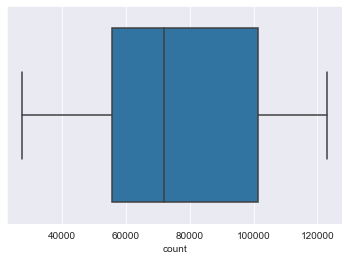

In [188]:
sns.boxplot(pas6['count'])

In [191]:
pas6 = pas6['2014-01-31':]

In [192]:
pas6

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,TAVG,PRCP,count
Date,,,,,
2014-01-31,30974.0,28899.0,6.522581,3.032258,61948.0
2014-02-28,24086.0,22939.0,5.289286,5.542857,48172.0
2014-03-31,32850.0,30644.0,8.903226,7.741935,65700.0
2014-04-30,44859.0,41996.0,10.786667,3.536667,89718.0
2014-05-31,61462.0,57182.0,14.848387,2.580645,122924.0
...,...,...,...,...,...
2019-02-28,13816.0,22283.0,2.621429,4.196429,27632.0
2019-03-31,34314.0,51143.0,8.654839,1.119355,68628.0
2019-04-30,34226.0,53706.0,11.066667,2.993333,68452.0


In [193]:
adf_test = adfuller(pas6['count'])
print('p-value = ' + str(adf_test[1]))
if adf_test[1]>0.05:
    print('Ряд не стационарный')
else:
    print('Ряд стационарный')

p-value = 0.6834135921542879
Ряд не стационарный


<AxesSubplot:xlabel='Date'>

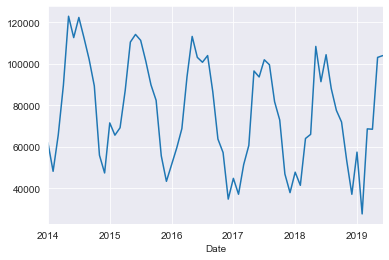

In [194]:
pas6['count'].plot()

In [195]:
pas6['Date1'] = pas6.index

C:\Temp\ipykernel_8232\4263785502.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pas6['Date1'] = pas6.index


In [196]:
pas6

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,TAVG,PRCP,count,Date1
Date,,,,,,
2014-01-31,30974.0,28899.0,6.522581,3.032258,61948.0,2014-01-31
2014-02-28,24086.0,22939.0,5.289286,5.542857,48172.0,2014-02-28
2014-03-31,32850.0,30644.0,8.903226,7.741935,65700.0,2014-03-31
2014-04-30,44859.0,41996.0,10.786667,3.536667,89718.0,2014-04-30
2014-05-31,61462.0,57182.0,14.848387,2.580645,122924.0,2014-05-31
...,...,...,...,...,...,...
2019-02-28,13816.0,22283.0,2.621429,4.196429,27632.0,2019-02-28
2019-03-31,34314.0,51143.0,8.654839,1.119355,68628.0,2019-03-31
2019-04-30,34226.0,53706.0,11.066667,2.993333,68452.0,2019-04-30


In [198]:
new_dates = pd.date_range('2014-01-31', '2014-12-31', freq='M')
new_dates = pd.Index(pas6['Date1']) | new_dates
df3 = pd.DataFrame({'Date1': new_dates})
df4 = pd.merge(pas6, df3, on='Date1', how='right')

C:\Temp\ipykernel_8232\629397508.py:2: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead.
  new_dates = pd.Index(pas6['Date1']) | new_dates


In [199]:
df4

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,TAVG,PRCP,count,Date1
0,30974.0,28899.0,6.522581,3.032258,61948.0,2014-01-31
1,24086.0,22939.0,5.289286,5.542857,48172.0,2014-02-28
2,32850.0,30644.0,8.903226,7.741935,65700.0,2014-03-31
3,44859.0,41996.0,10.786667,3.536667,89718.0,2014-04-30
4,61462.0,57182.0,14.848387,2.580645,122924.0,2014-05-31
...,...,...,...,...,...,...
61,13816.0,22283.0,2.621429,4.196429,27632.0,2019-02-28
62,34314.0,51143.0,8.654839,1.119355,68628.0,2019-03-31
63,34226.0,53706.0,11.066667,2.993333,68452.0,2019-04-30
64,51539.0,77584.0,15.300000,0.509677,103078.0,2019-05-31


In [200]:
pas6['month_num'] = range(1,len(pas6)+1)

C:\Temp\ipykernel_8232\3305092711.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pas6['month_num'] = range(1,len(pas6)+1)


In [201]:
for x in range(1,13):
    pas6['season_' + str(x)] = pas6['Date1'].dt.month == x

C:\Temp\ipykernel_8232\282488229.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pas6['season_' + str(x)] = pas6['Date1'].dt.month == x
C:\Temp\ipykernel_8232\282488229.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pas6['season_' + str(x)] = pas6['Date1'].dt.month == x
C:\Temp\ipykernel_8232\282488229.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

In [213]:
season_columns = ['season_' + str(x) for x in range(1,13)]
X1 = pas6[['month_num'] + season_columns]
Y1 = pas6['count']

In [214]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.2, random_state=0)

In [215]:
model.fit(X1_train, Y1_train)

LinearRegression()

In [216]:
test_pred1 = model.predict(X1_test)

In [217]:
model.predict(12)

C:\Users\gosti\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got scalar array instead:
array=12.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

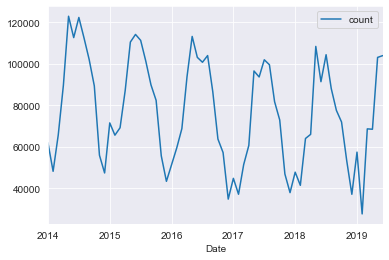

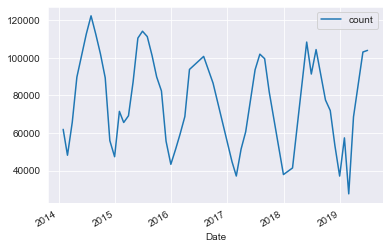

In [219]:
Y1.plot(legend=True,label='REAL')
Y1_train.plot(legend=True,label='TRAIN')
test_pred1.plot(legend=True,label='TEST', figsize=(6,4))
test_predictions_add.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted Test')

In [209]:
mae3 = mean_absolute_error(Y1_test, test_pred1)
mse3 = mean_squared_error(Y1_test, test_pred1)
R2 = r2_score(Y1_test, test_pred1)
print('MAE = ', np.round(mae3, 3))
print('MSE =', np.round(mse3, 3))
print('Коэффициент детерминации =', np.round(R2, 3))

MAE =  5530.922
MSE = 47682293.983
Коэффициент детерминации = 0.931


In [168]:
pas.index

DatetimeIndex(['2012-10-31', '2012-11-30', '2012-12-31', '2013-01-31',
               '2013-02-28', '2013-03-31', '2013-04-30', '2013-05-31',
               '2013-06-30', '2013-07-31', '2013-08-31', '2013-09-30',
               '2013-10-31', '2013-11-30', '2013-12-31', '2014-01-31',
               '2014-02-28', '2014-03-31', '2014-04-30', '2014-05-31',
               '2014-06-30', '2014-07-31', '2014-08-31', '2014-09-30',
               '2014-10-31', '2014-11-30', '2014-12-31', '2015-01-31',
               '2015-02-28', '2015-03-31', '2015-04-30', '2015-05-31',
               '2015-06-30', '2015-07-31', '2015-08-31', '2015-09-30',
               '2015-10-31', '2015-11-30', '2015-12-31', '2016-01-31',
               '2016-02-29', '2016-03-31', '2016-04-30', '2016-05-31',
               '2016-06-30', '2016-07-31', '2016-08-31', '2016-09-30',
               '2016-10-31', '2016-11-30', '2016-12-31', '2017-01-31',
               '2017-02-28', '2017-03-31', '2017-04-30', '2017-05-31',
      

In [169]:
pas2 = pd.DataFrame(pas1.dayofweek)

In [170]:
pas2

,Date
0,2
1,4
2,0
3,3
4,3
...,...
76,3
77,6
78,1
79,4


In [49]:
pas2.index = pas.index

In [50]:
pas2

,Date
Date,
2012-10-03,2
2012-10-04,3
2012-10-05,4
2012-10-06,5
2012-10-07,6
...,...
2019-06-26,2
2019-06-27,3
2019-06-28,4


In [51]:
pas3 = pd.concat([pas, pas2], axis=1, join='inner')

In [52]:
pas3 = pas3.drop(columns=pas3[['dayofweek']])

KeyError: "None of [Index(['dayofweek'], dtype='object')] are in the [columns]"

In [53]:
pas3.rename(columns={'Date' : 'Dayofweek'})

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Dayofweek
Date,,,
2012-10-03,1760.0,1761.0,2
2012-10-04,1708.0,1767.0,3
2012-10-05,1558.0,1590.0,4
2012-10-06,1080.0,926.0,5
2012-10-07,1191.0,951.0,6
...,...,...,...
2019-06-26,1891.0,3141.0,2
2019-06-27,1446.0,2523.0,3
2019-06-28,1753.0,3044.0,4


In [54]:
pas3.tail()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Date
Date,,,
2019-06-26,1891.0,3141.0,2
2019-06-27,1446.0,2523.0,3
2019-06-28,1753.0,3044.0,4
2019-06-29,1435.0,1748.0,5
2019-06-30,1541.0,1993.0,6


In [55]:
weather.head(100)

,DATE,TAVG,PRCP
0,2000-01-01,4.4,6.9
1,2000-01-02,-3.9,0.0
2,2000-01-03,5.6,7.1
3,2000-01-04,7.8,7.6
4,2000-01-05,5.0,0.0
...,...,...,...
95,2000-04-05,7.2,0.5
96,2000-04-06,7.2,3.0
97,2000-04-07,9.4,0.0
98,2000-04-08,11.1,0.0


In [56]:
weather.rename(columns={'DATE' : 'Date'}, inplace=True)

In [57]:
weather = weather.set_index('Date')

In [58]:
weather = weather['2012-10-03':'2019-06-30']

In [59]:
weather

,TAVG,PRCP
Date,,
2012-10-03,NaN,0.0
2012-10-04,NaN,0.0
2012-10-05,NaN,0.0
2012-10-06,NaN,0.0
2012-10-07,NaN,0.0
...,...,...
2019-06-26,NaN,0.3
2019-06-27,NaN,2.0
2019-06-28,16.1,0.0


In [60]:
pas3.rename(columns={'Date' : 'Dayofweek'}, inplace=True)

In [61]:
weather.index = weather.index.astype(str)
pas3.index = pas3.index.astype(str)

In [149]:
weather

,TAVG,PRCP
Date,,
2012-10-03,NaN,0.0
2012-10-04,NaN,0.0
2012-10-05,NaN,0.0
2012-10-06,NaN,0.0
2012-10-07,NaN,0.0
...,...,...
2019-06-26,NaN,0.3
2019-06-27,NaN,2.0
2019-06-28,16.1,0.0


In [62]:
pas3

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Dayofweek
Date,,,
2012-10-03,1760.0,1761.0,2
2012-10-04,1708.0,1767.0,3
2012-10-05,1558.0,1590.0,4
2012-10-06,1080.0,926.0,5
2012-10-07,1191.0,951.0,6
...,...,...,...
2019-06-26,1891.0,3141.0,2
2019-06-27,1446.0,2523.0,3
2019-06-28,1753.0,3044.0,4


In [63]:
df = pd.merge(weather, how='inner',right=pas3,left_on=weather.index,right_on=pas3.index)

In [64]:
df.rename(columns={'key_0' : 'Date'}, inplace=True)
df = df.set_index('Date')

In [65]:
df

,TAVG,PRCP,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Dayofweek
Date,,,,,
2012-10-03,NaN,0.0,1760.0,1761.0,2
2012-10-04,NaN,0.0,1708.0,1767.0,3
2012-10-05,NaN,0.0,1558.0,1590.0,4
2012-10-06,NaN,0.0,1080.0,926.0,5
2012-10-07,NaN,0.0,1191.0,951.0,6
...,...,...,...,...,...
2019-06-26,NaN,0.3,1891.0,3141.0,2
2019-06-27,NaN,2.0,1446.0,2523.0,3
2019-06-28,16.1,0.0,1753.0,3044.0,4


In [66]:
df = df.dropna(axis=0)

In [67]:
df['count'] = df['Fremont Bridge East Sidewalk'] + df['Fremont Bridge East Sidewalk']

C:\Temp\ipykernel_8232\4059328042.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['count'] = df['Fremont Bridge East Sidewalk'] + df['Fremont Bridge East Sidewalk']


In [68]:
df

,TAVG,PRCP,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Dayofweek,count
Date,,,,,,
2013-04-01,12.8,0.0,1654.0,1594.0,0,3308.0
2013-04-02,11.5,0.0,1685.0,1602.0,1,3370.0
2013-04-03,11.7,0.0,1739.0,1747.0,2,3478.0
2013-04-04,12.0,8.4,1016.0,991.0,3,2032.0
2013-04-05,12.2,18.5,914.0,928.0,4,1828.0
...,...,...,...,...,...,...
2019-06-24,14.7,0.0,1862.0,3086.0,0,3724.0
2019-06-25,16.6,0.0,2294.0,3766.0,1,4588.0
2019-06-28,16.1,0.0,1753.0,3044.0,4,3506.0


In [69]:
df1 = df.groupby('Dayofweek')['count'].mean()

In [70]:
df1

Dayofweek
0    2930.509202
1    3164.006135
2    3140.172308
3    2983.378462
4    2683.085890
5    1568.000000
6    1523.165644
Name: count, dtype: float64

<AxesSubplot:title={'center':'Среднее кол-во людей, проходящих через мост'}, xlabel='Dayofweek'>

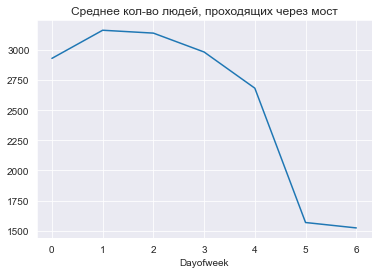

In [71]:

df1.plot(title='Среднее кол-во людей, проходящих через мост')

<AxesSubplot:xlabel='Date'>

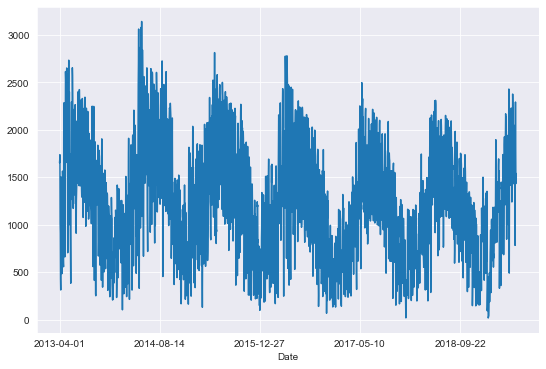

In [72]:
df['Fremont Bridge East Sidewalk'].plot(figsize=(9,6))

In [73]:
import seaborn as sns

C:\Users\gosti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='count'>

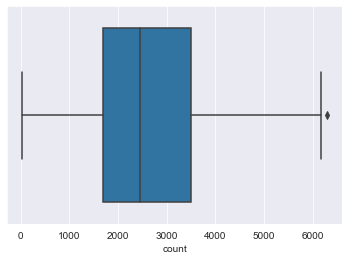

In [74]:
sns.boxplot(df['count'])

In [75]:
print(np.where(df['count']>6000))

(array([395, 407, 408, 410], dtype=int64),)


In [76]:
df.iloc[[395, 407, 408, 410]]

,TAVG,PRCP,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Dayofweek,count
Date,,,,,,
2014-05-01,20.7,0.0,3063.0,2874.0,3,6126.0
2014-05-13,19.3,0.0,3080.0,3008.0,1,6160.0
2014-05-14,20.6,0.0,3035.0,2852.0,2,6070.0
2014-05-16,16.7,0.0,3143.0,2599.0,4,6286.0


In [77]:
df = df.drop(index = ['2014-05-01', '2014-05-13', '2014-05-14', '2014-05-16'])

In [78]:
df

,TAVG,PRCP,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Dayofweek,count
Date,,,,,,
2013-04-01,12.8,0.0,1654.0,1594.0,0,3308.0
2013-04-02,11.5,0.0,1685.0,1602.0,1,3370.0
2013-04-03,11.7,0.0,1739.0,1747.0,2,3478.0
2013-04-04,12.0,8.4,1016.0,991.0,3,2032.0
2013-04-05,12.2,18.5,914.0,928.0,4,1828.0
...,...,...,...,...,...,...
2019-06-24,14.7,0.0,1862.0,3086.0,0,3724.0
2019-06-25,16.6,0.0,2294.0,3766.0,1,4588.0
2019-06-28,16.1,0.0,1753.0,3044.0,4,3506.0


<AxesSubplot:xlabel='Date'>

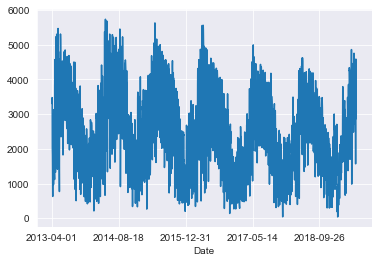

In [79]:
df['count'].plot()

In [145]:
from statsmodels.tsa.stattools import adfuller

In [148]:
adf_test = adfuller(df['count'])
print('p-value = ' + str(adf_test[1]))
if adf_test[1]>0.05:
    print('Ряд не стационарный')
else:
    print('Ряд стационарный')

p-value = 0.05985210731771392
Ряд не стационарный


In [80]:
from sklearn.linear_model import LinearRegression

In [81]:
model = LinearRegression()

In [132]:
X = df[['TAVG']][-365:]
Y = df['count'][-365:]

In [133]:
X

,TAVG
Date,
2018-06-29,16.4
2018-06-30,17.2
2018-07-01,16.2
2018-07-02,15.6
2018-07-03,16.1
...,...
2019-06-24,14.7
2019-06-25,16.6
2019-06-28,16.1


<AxesSubplot:xlabel='Date'>

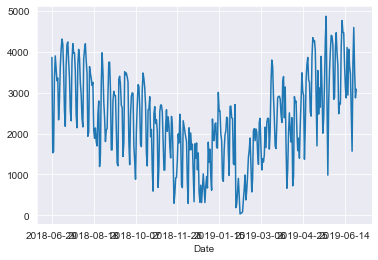

In [147]:
Y.plot()

In [105]:
from sklearn.model_selection import train_test_split

In [134]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [135]:
model.fit(X_train, Y_train)

LinearRegression()

In [136]:
test_pred = pd.DataFrame(model.predict(X_test))

In [138]:
Y

Date
2018-06-29    3856.0
2018-06-30    1530.0
2018-07-01    1564.0
2018-07-02    3332.0
2018-07-03    3894.0
               ...  
2019-06-24    3724.0
2019-06-25    4588.0
2019-06-28    3506.0
2019-06-29    2870.0
2019-06-30    3082.0
Name: count, Length: 365, dtype: float64

In [139]:
Y_train

Date
2019-04-20    1886.0
2018-08-31    2388.0
2019-02-25    2066.0
2019-05-01    3856.0
2019-05-12    1698.0
               ...  
2019-05-18    3118.0
2019-01-07    2354.0
2018-10-24    2898.0
2018-08-15    3346.0
2018-12-18    1402.0
Name: count, Length: 292, dtype: float64

Text(0.5, 1.0, 'Train, Test and Predicted Test')

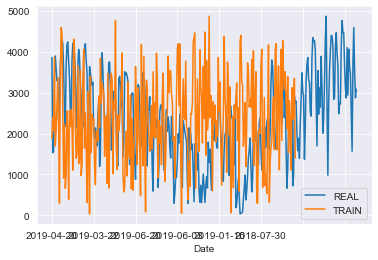

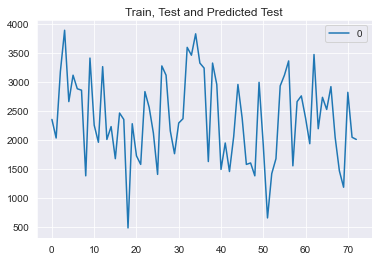

In [137]:
Y.plot(legend=True,label='REAL')
Y_train.plot(legend=True,label='TRAIN')
test_pred.plot(legend=True,label='TEST', figsize=(6,4))
plt.title('Train, Test and Predicted Test')

In [113]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [140]:
mae = mean_absolute_error(Y_test, test_pred)
mse = mean_squared_error(Y_test, test_pred)
R2 = r2_score(Y_test, test_pred)
print('MAE = ', np.round(mae, 3))
print('MSE =', np.round(mse, 3))
print('Коэффициент детерминации =', np.round(R2, 3))

MAE =  683.357
MSE = 678444.999
Коэффициент детерминации = 0.375


In [125]:
X2 = df[['TAVG', 'Dayofweek']][-730:]
Y2 = df['count'][-730:]

In [141]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.2, random_state=0)

In [142]:
model.fit(X2_train, Y2_train)

LinearRegression()

In [143]:
test_pred2 = pd.DataFrame(model.predict(X2_test))

In [144]:
mae2 = mean_absolute_error(Y2_test, test_pred2)
mse2 = mean_squared_error(Y2_test, test_pred2)
R2 = r2_score(Y_test, test_pred)
print('MAE = ', np.round(mae2, 3))
print('MSE =', np.round(mse2, 3))
print('Коэффициент детерминации =', np.round(R2, 3))

MAE =  570.103
MSE = 510543.668
Коэффициент детерминации = 0.375
